In [1]:
!pip install emnist

In [2]:
#Install EMIST library, import datasets of letters, Matplotlib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
  from emnist import list_datasets
  list_datasets()
  #['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [4]:
from emnist import extract_training_samples
train_images, train_labels = extract_training_samples('balanced')
print(train_images.shape)
print(train_labels.shape)

(112800, 28, 28)
(112800,)


In [5]:
from emnist import extract_test_samples
test_images, test_labels = extract_test_samples('balanced')
print(test_images.shape)
print(test_labels.shape)

(18800, 28, 28)
(18800,)


In [6]:
train_data = pd.DataFrame(train_images.reshape(112800,784))
train_labels = pd.DataFrame(train_labels.reshape(112800))
test_data = pd.DataFrame(test_images.reshape(18800,784))

In [7]:
print(train_data.shape)
print(test_data.shape)

(112800, 784)
(18800, 784)


/Users/andyshin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

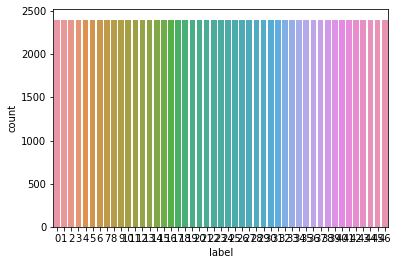

In [8]:
train_data = train_labels.join(train_data,how='left',lsuffix="left",rsuffix="")
train_data = train_data.rename(columns={'0left':'label'})
sns.countplot(train_data["label"])

/Users/andyshin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0     2400
35    2400
26    2400
27    2400
28    2400
29    2400
30    2400
31    2400
32    2400
33    2400
34    2400
36    2400
24    2400
37    2400
38    2400
39    2400
40    2400
41    2400
42    2400
43    2400
44    2400
45    2400
25    2400
23    2400
1     2400
11    2400
2     2400
3     2400
4     2400
5     2400
6     2400
7     2400
8     2400
9     2400
10    2400
12    2400
22    2400
13    2400
14    2400
15    2400
16    2400
17    2400
18    2400
19    2400
20    2400
21    2400
46    2400
Name: label, dtype: int64

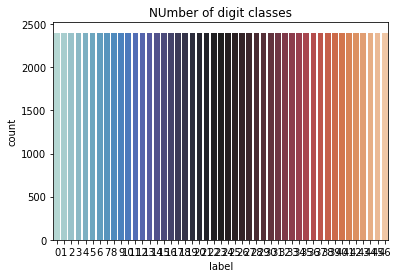

In [9]:
## Visualizing the number of class and counts in the datasets
plt.plot(figure = (16,10))
g = sns.countplot( train_data["label"], palette = 'icefire')
plt.title('NUmber of digit classes')
train_data.label.astype('category').value_counts()

Text(0.5, 1.0, 'Digit 4')

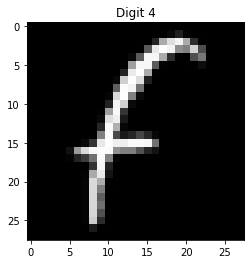

In [10]:
four = train_data.iloc[3, 1:]
four.shape
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.title("Digit 4")

In [11]:
round(train_data.drop('label', axis=1).mean(), 2)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
779    0.0
780    0.0
781    0.0
782    0.0
783    0.0
Length: 784, dtype: float64

In [12]:
y = train_data['label']

## Dropping the variable 'label' from X variable 
X = train_data.drop(columns = 'label')

## Printing the size of data 
print(train_data.shape)

(112800, 785)


In [13]:
## Normalization

X = X/255.0
test_data = test_data/255.0

print("X:", X.shape)
print("test_data:", test_data.shape)

X: (112800, 784)
test_data: (18800, 784)


In [14]:
# confusion matrix and accuracy
# scaling the features
from sklearn.preprocessing import scale
X_scaled = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)


In [15]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)



In [16]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.6816193853427897 

[[376   0   0 ...   1   0   3]
 [  0 422   1 ...   2   2   4]
 [  2   0 511 ...   3   0   1]
 ...
 [  2   0   2 ... 230   2   8]
 [  0   3   0 ...   1 572   4]
 [  1  19   2 ...   5  21 369]]


In [17]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [18]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.7656323877068558 

[[441   0   0 ...   1   0   1]
 [  0 610   0 ...   0   1   4]
 [  1   0 529 ...   5   0   1]
 ...
 [  1   2   0 ... 287   3   3]
 [  0   0   0 ...   0 629   3]
 [  1  13   0 ...   2   5 513]]
